# 次の実験候補の各溶液濃度の分布を確認

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 実験結果データの読み込み
dataset = pd.read_csv('./../data/next_samples_bo_2024-01-12.csv', index_col=0, header=0)

# amino_acid = dataset["AA"]
# plt.hist(amino_acid, bins=20)

# mg = dataset["Mg"]
# plt.hist(mg, bins=20)

# k = dataset["K"]
# plt.hist(k, bins=20)

# spd = dataset["SPD"]
# plt.hist(spd, bins=20)

# ntp = dataset["NTP"]
# plt.hist(ntp, bins=20)

# pga = dataset["3-PGÅ"]
# plt.hist(pga, bins=20)


# 次の実験の候補からexcelを作成しやすい形に編集する

In [134]:
import pandas as pd
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

date = '2024-01-26'
# 実験候補データの読み込み
dataset = pd.read_csv(f'./../data/next_samples_bo_{date}.csv', index_col=0, header=0)

#  分注後の濃度:ストック濃度
AA = {1.5: 6, 0.83: 4.15, 0.15: 0.6}
Mg = {8: 80, 4.4: 44, 0.8: 16}
K = {80: 1600, 44: 880, 8: 160}
SPD = {1: 20, 0.55: 11, 0.1: 2}
NTP = {1.25: 25, 0.7: 14, 0.15: 3}
PGA = {30: 600, 16.5: 330, 3: 60}

# まず空のDataFrameを作成します
columns=['AA', 'Mg', 'K', 'SPD', 'NTP', '3-PGÅ','PEG','mixture','DNA','cell_extract','milliQ']
combined_df = pd.DataFrame(columns=columns)

number = 1
conditions = []
# datasetの各行をループ処理します
for index, row in dataset.iterrows():
    # 特定の値を含む新しい行を追加
    new_values = [AA[row[0]], Mg[row[1]], K[row[2]], SPD[row[3]], NTP[row[4]], PGA[row[5]],None,None,None,None,None]
    new_row = pd.Series(new_values, index=combined_df.columns)
    combined_df.loc[number] = new_row

    # 現在の行をcombined_dfに追加します
    combined_df.loc[f'最終濃度_{number}'] = row

    dispensation_values=[row[0]/AA[row[0]]*20,row[1]/Mg[row[1]]*20,row[2]/K[row[2]]*20,row[3]/SPD[row[3]]*20,row[4]/NTP[row[4]]*20,row[5]/PGA[row[5]]*20,1,1,1,5,20-((row[0]/AA[row[0]]*20)+(row[1]/Mg[row[1]]*20)+(row[2]/K[row[2]]*20)+(row[3]/SPD[row[3]]*20)+(row[4]/NTP[row[4]]*20)+(row[5]/PGA[row[5]]*20)+1+1+1+5)]

    combined_df.loc[f'分注量_{number}'] = dispensation_values

    condition ={
        f'AA_{AA[row[0]]}':int(Decimal(row[0]/AA[row[0]]*20).quantize(Decimal('0'), rounding=ROUND_HALF_UP)),
        'milliQ':20-((row[0]/AA[row[0]]*20)+(row[1]/Mg[row[1]]*20)+(row[2]/K[row[2]]*20)+(row[3]/SPD[row[3]]*20)+(row[4]/NTP[row[4]]*20)+(row[5]/PGA[row[5]]*20)+1+1+1+5),
        f'Mg_{Mg[row[1]]}':int(Decimal(row[1]/Mg[row[1]]*20).quantize(Decimal('0'), rounding=ROUND_HALF_UP)),
        f'K_{K[row[2]]}':int(Decimal(row[2]/K[row[2]]*20).quantize(Decimal('0'), rounding=ROUND_HALF_UP)),
        f'SPD_{SPD[row[3]]}':int(Decimal(row[3]/SPD[row[3]]*20).quantize(Decimal('0'), rounding=ROUND_HALF_UP)),
        f'NTP_{NTP[row[4]]}':int(Decimal(row[4]/NTP[row[4]]*20).quantize(Decimal('0'), rounding=ROUND_HALF_UP)),
        f'3PGA_{PGA[row[5]]}':int(Decimal(row[5]/PGA[row[5]]*20).quantize(Decimal('0'), rounding=ROUND_HALF_UP)),
        f'PEG':1,f'mixture':1,f'DNA':1,f'cell_extract':5
    }
    conditions.append(condition)
    number += 1

combined_df.fillna(0)

# ループが完了したら、結合したDataFrameをCSVファイルに出力します
combined_df.T.to_csv(f'./../data/next_samples_bo_{date}T.csv', index=True)

for i,v in enumerate(conditions):
    print(f'condition{i+1}={v}')



condition1={'AA_6': 5, 'milliQ': 1.0, 'Mg_44': 2, 'K_880': 1, 'SPD_20': 1, 'NTP_25': 1, '3PGA_600': 1, 'PEG': 1, 'mixture': 1, 'DNA': 1, 'cell_extract': 5}
condition2={'AA_6': 5, 'milliQ': 2.0, 'Mg_16': 1, 'K_1600': 1, 'SPD_20': 1, 'NTP_14': 1, '3PGA_600': 1, 'PEG': 1, 'mixture': 1, 'DNA': 1, 'cell_extract': 5}
condition3={'AA_4.15': 4, 'milliQ': 2.0, 'Mg_80': 2, 'K_1600': 1, 'SPD_20': 1, 'NTP_25': 1, '3PGA_60': 1, 'PEG': 1, 'mixture': 1, 'DNA': 1, 'cell_extract': 5}
condition4={'AA_4.15': 4, 'milliQ': 2.0, 'Mg_80': 2, 'K_1600': 1, 'SPD_11': 1, 'NTP_25': 1, '3PGA_60': 1, 'PEG': 1, 'mixture': 1, 'DNA': 1, 'cell_extract': 5}
condition5={'AA_4.15': 4, 'milliQ': 2.0, 'Mg_80': 2, 'K_1600': 1, 'SPD_2': 1, 'NTP_25': 1, '3PGA_600': 1, 'PEG': 1, 'mixture': 1, 'DNA': 1, 'cell_extract': 5}
condition6={'AA_4.15': 4, 'milliQ': 2.0, 'Mg_80': 2, 'K_1600': 1, 'SPD_2': 1, 'NTP_25': 1, '3PGA_330': 1, 'PEG': 1, 'mixture': 1, 'DNA': 1, 'cell_extract': 5}
condition7={'AA_6': 5, 'milliQ': 2.0, 'Mg_16': 1, '

# 実験結果をbox plotとjitter plotでチェックする

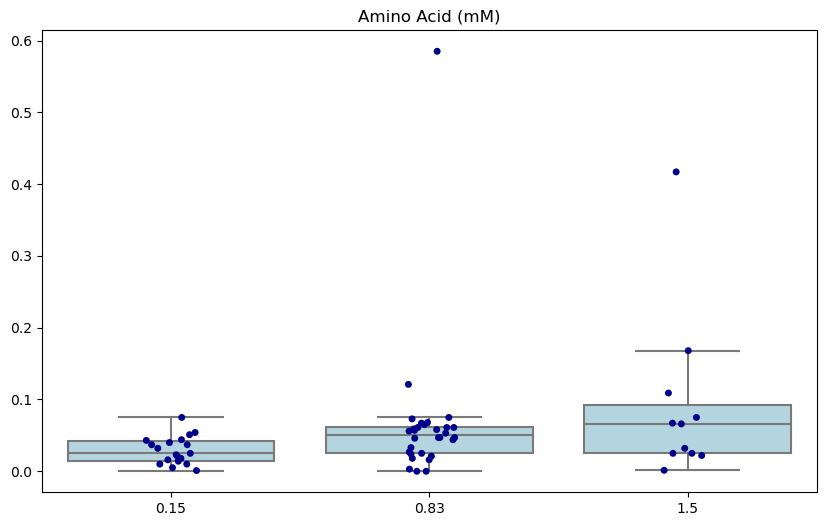

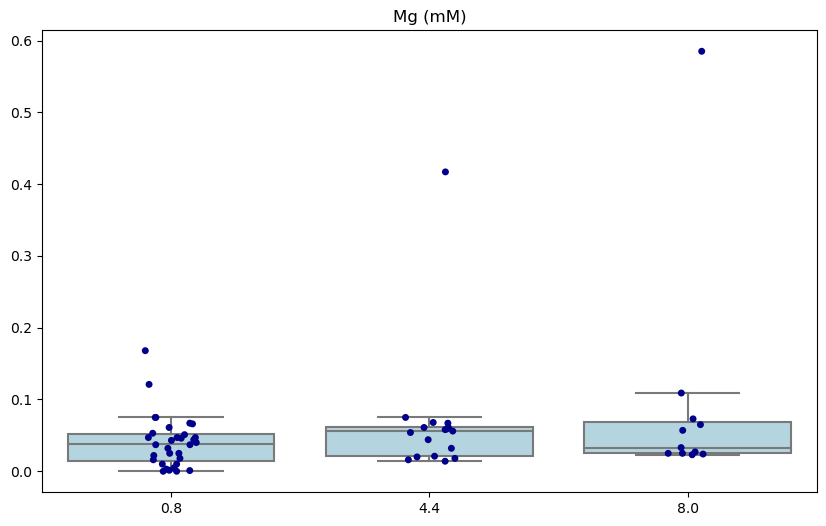

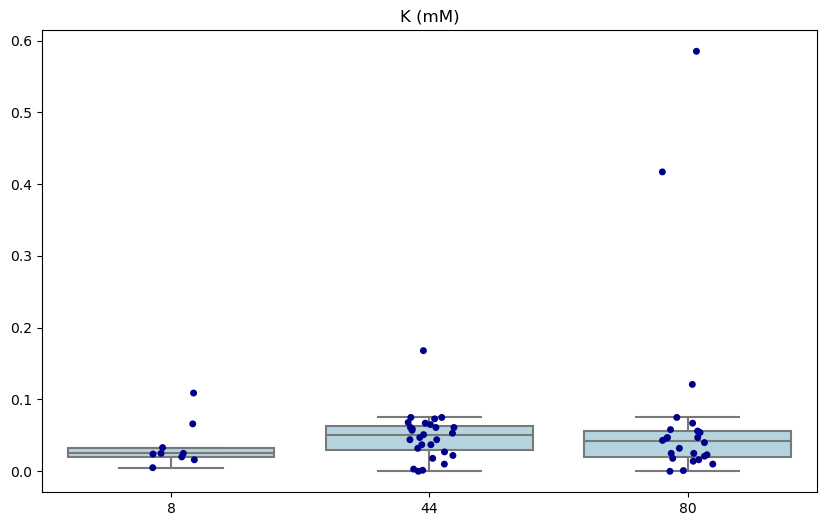

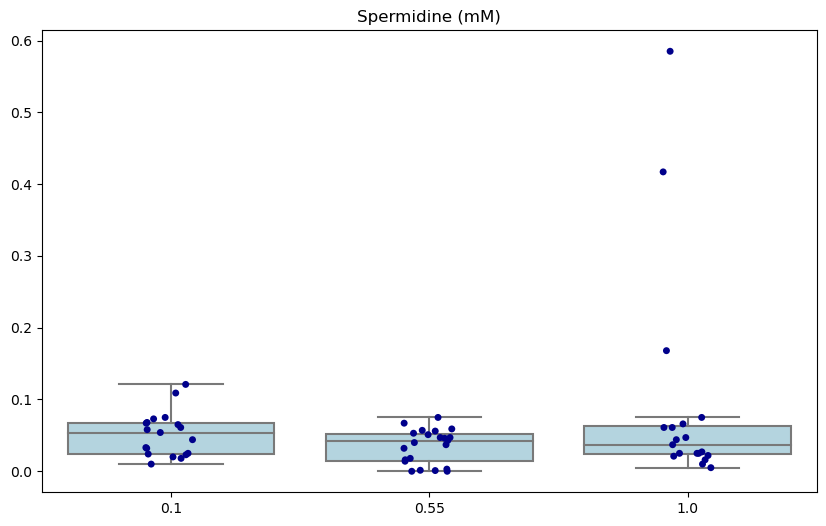

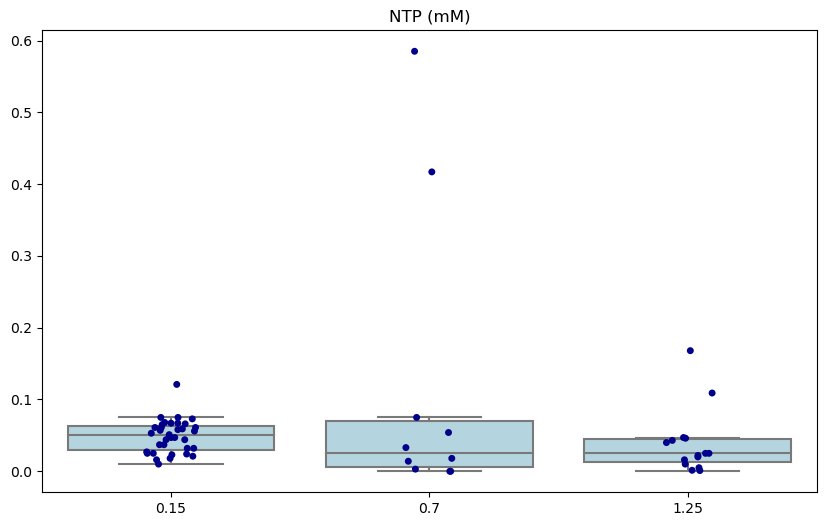

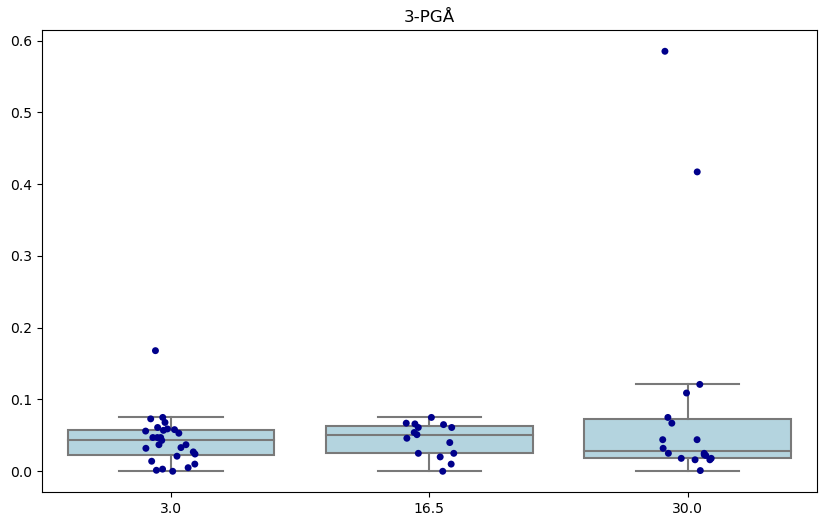

In [118]:
# 実験結果をbox plotとjitter plotでチェックする

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 実験結果のCSVファイルを読み込む
df = pd.read_csv("/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result_2.csv")

df = df.drop("Unnamed: 0",axis=1)

# データフレームから辞書に変換
data_dict = df.to_dict(orient='list')


# 特定の化学成分（ここでは"Mg (mM)"）に対するボックスプロットとジッタープロット
plt.figure(figsize=(10, 6))
sns.boxplot(x='アミノ酸(mM)', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='アミノ酸(mM)', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('Amino Acid (mM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Mg (mM)', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='Mg (mM)', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('Mg (mM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='K (mM)', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='K (mM)', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('K (mM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='スペルミジン (mM)', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='スペルミジン (mM)', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('Spermidine (mM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='NTP (mM)', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='NTP (mM)', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('NTP (mM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='3-PGÅ', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='3-PGÅ', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('3-PGÅ')
plt.show()

# 各ラウンドごとの収量データを比較する・実験結果をbox plotとjitter plotでチェックする


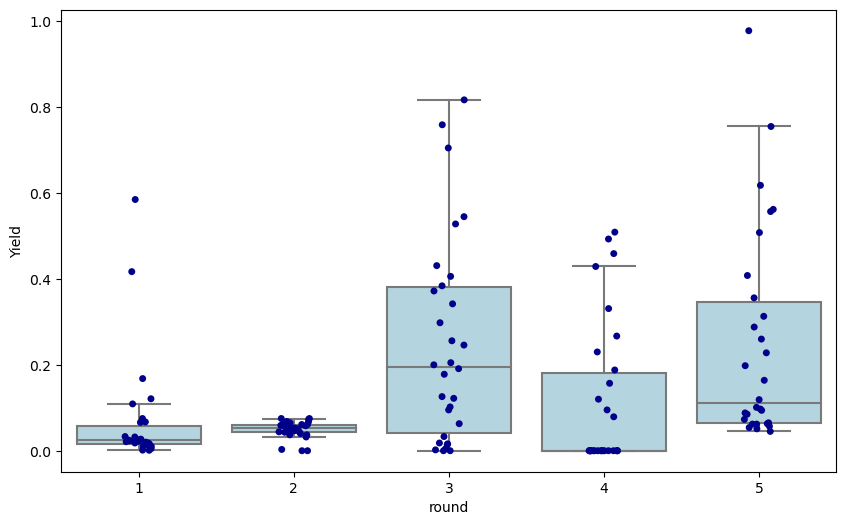

In [135]:
# 各ラウンドごとの収量データを比較する
# 実験結果をbox plotとjitter plotでチェックする

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

files = [
    "/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result_20231228.csv",
    "/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result_20240111.csv",
    "/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result_20240112.csv",
    "/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result_20240125.csv",
     "/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result_20240131.csv",
]

# 空のデータフレームを作成
all_data = pd.DataFrame()

# 各ファイルからデータを読み込み、統合する
for i, file in enumerate(files):
    df = pd.read_csv(file)
    df['round'] = f"{i+1}"  # 実験の識別子を追加

    all_data = pd.concat([all_data, df], ignore_index=True)

# 特定の化学成分（ここでは"Mg (mM)"）に対するボックスプロットとジッタープロット
plt.figure(figsize=(10, 6))
sns.boxplot(x='round', y='Yield', data=all_data, color='lightblue', showfliers=False)
sns.stripplot(x='round', y='Yield', data=all_data, color='darkblue', jitter=True)
plt.show()

# mutual information analysis(相互情報量分析)

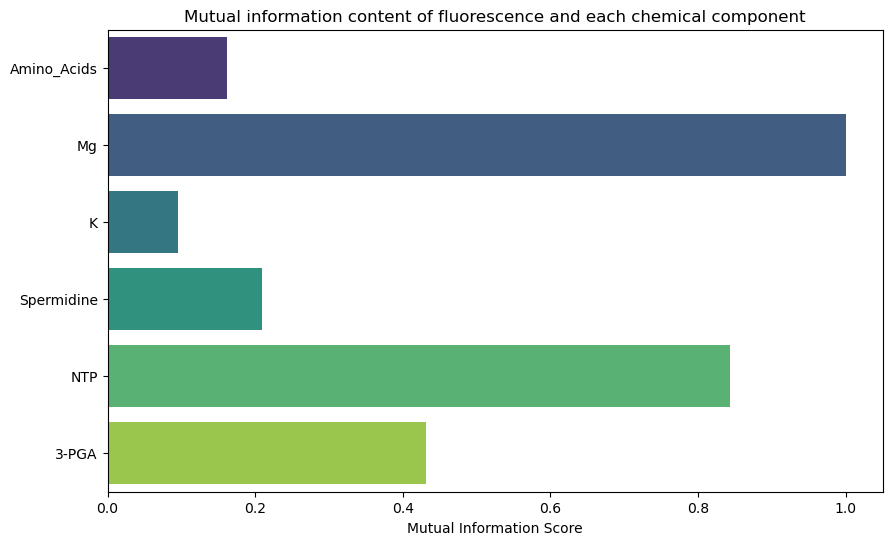

In [136]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  実験結果データの読み込み
data = pd.read_csv('./../data/result_2.csv')

# 列の名前を英語に変更
data.columns = ['Index', 'Yield', 'Amino_Acids', 'Mg', 'K', 'Spermidine', 'NTP', '3-PGA']

# 目的変数（Yield）と説明変数（他の全ての列）に分割
X = data.drop(['Index', 'Yield'], axis=1)
y = data['Yield']

# 相互情報量の計算
mi = mutual_info_regression(X, y)
mi /= np.max(mi)  # 正規化

# 結果の表示
mi_result = pd.Series(mi, index=X.columns)
mi_result.sort_values(ascending=False)


# 結果の可視化
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_result.values, y=mi_result.index, palette="viridis")
plt.title('Mutual information content of fluorescence and each chemical component')
plt.xlabel('Mutual Information Score')
plt.show()

# 実際のデータを使った発現量順のプロット

#予測値のデータを使った発現量のプロット